In [17]:
from utils import *
import pandas as pd
import numpy as np

# Getting all the processed data
combined_df = load_from_pickle("unprocessed_data") # Original and untouched

clustered_data_load= load_from_pickle("direct_clustered_data") # Clustering performed without applying PCA first
clustered_data_1= clustered_data_load["cir_data_pca"]

clustered_data_load2 = load_from_pickle("pca_clustered_data") # Clustering performed but WITH PCA applied first
clustered_data_2 = clustered_data_load2["cir_data_pca"]

dbscan_data_1 = load_from_pickle("8_features_DBSCAN_data") # DBSCAN with Method 1: Drop all CIR columns, then PCA
dbscan_data_2 = load_from_pickle("direct_PCA_DBSCAN_data")  # DBSCAN with Method 2: Apply PCA directly
dbscan_data_3 = load_from_pickle("unscaled_DBSCAN_data") # DBSCAN with Method 3: DF Without PCA

dataset_1 = load_from_pickle("dataset_1")
dataset_2 = load_from_pickle("dataset_2")
dataset_3 = load_from_pickle("dataset_3")
dataset_4 = load_from_pickle("dataset_4")

# Supervised Learning using Support Vector Machines

## Support Vector Machine (Dataset 4)

Summary

The Radial Basis Function performed signficiantly better as compared to the Linear Function with a training and testing accuracy of 92.6% and 89.7% as compared to the linear's function's accuracy of 85.1% and 85.4%.

The Radial Basis Function also showed better F1-Scores than the Linear Function which suggests that a more accurate prediction/classification of LOS and NLOS data however, both functions displayed a huge difference in being able to classify NLOS data as according to their confusion matrix

### Kernel Function (Radial Basis Function)

This in case the kernel function that will be used for SVM is the Radial Basis Function

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


# Select the features to be used for Support Vector Classification
X = dataset_4.drop(columns = 'NLOS')
Y = dataset_4[['NLOS']].to_numpy()
Y = Y.reshape(-1)

# Standardizing the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

# Split dataset into 70% training and 30% test
x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size = 0.3, random_state = 12)

In [19]:
# Create a SVM Classifier with the kernel of radial basis function (RBF) for non-linear hyperplane
clf = SVC(kernel = 'rbf', random_state = 12, gamma = 'auto')

# Train the model using the training sets
clf.fit(x_train, y_train)

# Predict the response for the train dataset
y_train_pred = clf.predict(x_train)

# Predict the response for the test dataset
y_test_pred = clf.predict(x_test)

# Export model
save_to_pickle(f'{MODEL_FOLDER}/svm_rbf_70_30.pkl', clf, complete_path=False)

In [20]:
# SVM (RBF) Model Performance for the Training Dataset
results = classifier_metrics(list(y_train), y_train_pred, print_results = True)

Accuracy: 0.9255442176870748
Precision: 0.9276261249477162
Recall: 0.9256425864463317
F1 Score: 0.9254645807013674
Mean Squared Error (MSE): 0.07445578231292517
Matthews Correlation Coefficient (MCC): 0.8532664058891999
Cohen's Kappa: 0.8511167403492663
Hamming Loss: 0.07445578231292517

Confusion Matrix:
 [[14086   573]
 [ 1616 13125]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.96      0.93     14659
         1.0       0.96      0.89      0.92     14741

    accuracy                           0.93     29400
   macro avg       0.93      0.93      0.93     29400
weighted avg       0.93      0.93      0.93     29400





In [21]:
# SVM (RBF) Model Performance for the Testing Dataset
results = classifier_metrics(list(y_test), y_test_pred, print_results=True)

Accuracy: 0.8984126984126984
Precision: 0.900925740925741
Recall: 0.8981583976887506
F1 Score: 0.8982072946339112
Mean Squared Error (MSE): 0.10158730158730159
Matthews Correlation Coefficient (MCC): 0.7990793467464122
Cohen's Kappa: 0.796715149750526
Hamming Loss: 0.10158730158730159

Confusion Matrix:
 [[5943  398]
 [ 882 5377]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      6341
         1.0       0.93      0.86      0.89      6259

    accuracy                           0.90     12600
   macro avg       0.90      0.90      0.90     12600
weighted avg       0.90      0.90      0.90     12600





Confusion Matrix is a performance evaluation tool in machine learning, representing the accuracy of a classification model. It displays the number of true positives, true negatives, false positives, and false negatives. This matrix aids in analyzing model performance, identifying misclassifications, and improving predictive accuracy.

![alt text](https://av-eks-blogoptimized.s3.amazonaws.com/Basic-Confusion-matrix.png)

True Positive
- The predicted value matches the actual value, or the predicted class matches the actual class

True Negative
- The predicted value matches the actual value, or the predicted class matches the actual class

False Positive
- The predicted value was falsely predicted
- The actual value was negative, but the model predicted a positive value

False Negative
- The predicted value was falsely predicted
- The actual value was positive, but the model predicted a negative value

Based on the results of both the training and testing confusion matrix, the model is weaker in the identification of NLOS (1).

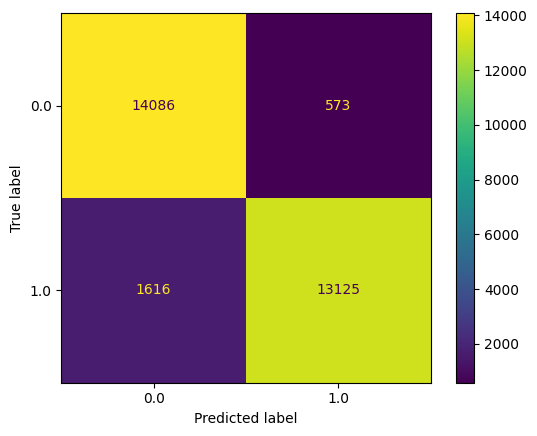

In [22]:
import matplotlib.pyplot as plt

predictions = clf.predict(x_train)
cm = confusion_matrix(y_train, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

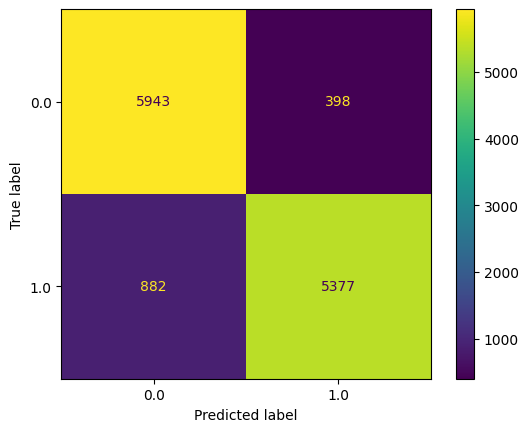

In [23]:
import matplotlib.pyplot as plt

predictions = clf.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

### Kernel Function (Linear)

In [24]:
# Create a SVM Classifier with the kernel of linear for linear hyperplane
clf = SVC(kernel = 'linear', gamma = 'auto', random_state = 12)

clf.fit(x_train, y_train)

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

# Export model
save_to_pickle(f'{MODEL_FOLDER}/svm_linear_70_30.pkl', clf, complete_path=False)

In [25]:
# SVM (RBF) Model Performance for the Training Dataset
results = classifier_metrics(list(y_train), y_train_pred, print_results = True)

Accuracy: 0.8524489795918367
Precision: 0.859630607629706
Recall: 0.8526461071688007
F1 Score: 0.8517574582164911
Mean Squared Error (MSE): 0.14755102040816326
Matthews Correlation Coefficient (MCC): 0.7122424693862792
Cohen's Kappa: 0.7050126409970034
Hamming Loss: 0.14755102040816326

Confusion Matrix:
 [[13535  1124]
 [ 3214 11527]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.92      0.86     14659
         1.0       0.91      0.78      0.84     14741

    accuracy                           0.85     29400
   macro avg       0.86      0.85      0.85     29400
weighted avg       0.86      0.85      0.85     29400





In [26]:
# SVM (RBF) Model Performance for the Training Dataset
results = classifier_metrics(list(y_test), y_test_pred, print_results = True)

Accuracy: 0.8521428571428571
Precision: 0.859596962985223
Recall: 0.8516743049762324
F1 Score: 0.8512485032917522
Mean Squared Error (MSE): 0.14785714285714285
Matthews Correlation Coefficient (MCC): 0.7112271424218631
Cohen's Kappa: 0.7039995133616721
Hamming Loss: 0.14785714285714285

Confusion Matrix:
 [[5857  484]
 [1379 4880]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.92      0.86      6341
         1.0       0.91      0.78      0.84      6259

    accuracy                           0.85     12600
   macro avg       0.86      0.85      0.85     12600
weighted avg       0.86      0.85      0.85     12600





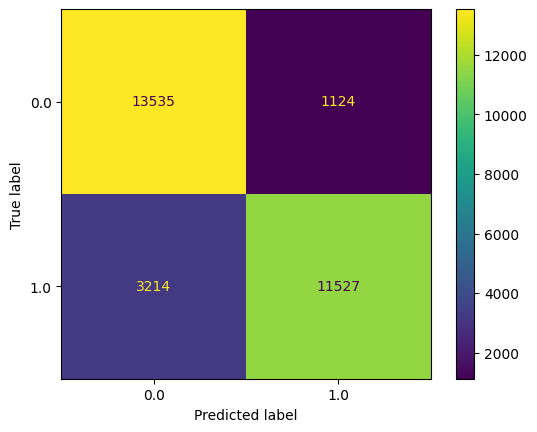

In [27]:
predictions = clf.predict(x_train)
cm = confusion_matrix(y_train, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

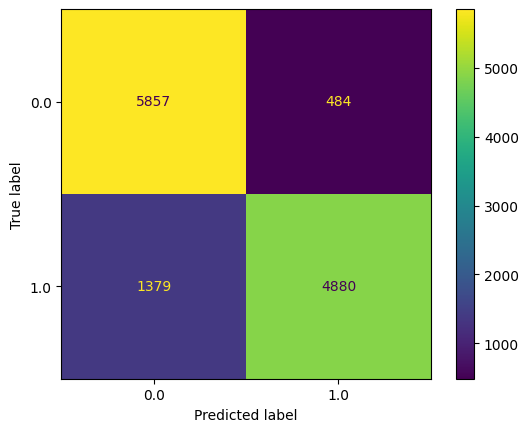

In [28]:
predictions = clf.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

# Multilayer Perceptron (MLP) Classifier

## MLP (Dataset 4)

In [29]:
# Select the features to be used for Support Vector Classification
X = dataset_4.drop(columns = 'NLOS')
Y = dataset_4[['NLOS']].to_numpy()
Y = Y.reshape(-1)

# Standardizing the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

# Split dataset into 70% training and 30% test
x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size = 0.3)

In [32]:
from sklearn.neural_network import MLPClassifier

# 3 Hidden Layers with 50 Neurons each
clf = MLPClassifier(activation = 'relu', solver = 'adam', hidden_layer_sizes = (50, 50, 50), random_state = 12, max_iter = 500)

clf.fit(x_train, y_train)

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)


save_to_pickle(f'{MODEL_FOLDER}/mlp_3_layer_50_neurons_70_30.pkl', clf, complete_path=False)

In [33]:
print("Training Accuracy: %.4f" % accuracy_score(y_train, y_train_pred))
print("Testing Accuracy: %.4f" % accuracy_score(y_test, y_test_pred))

Training Accuracy: 0.9931
Testing Accuracy: 0.8900


In [34]:
# Training Results
results = classifier_metrics(list(y_train), y_train_pred, print_results = True)

Accuracy: 0.993061224489796
Precision: 0.9930902135094481
Recall: 0.9930746966315612
F1 Score: 0.9930612044206246
Mean Squared Error (MSE): 0.0069387755102040816
Matthews Correlation Coefficient (MCC): 0.9861649100189338
Cohen's Kappa: 0.9861227057952683
Hamming Loss: 0.0069387755102040816

Confusion Matrix:
 [[14573   170]
 [   34 14623]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     14743
         1.0       0.99      1.00      0.99     14657

    accuracy                           0.99     29400
   macro avg       0.99      0.99      0.99     29400
weighted avg       0.99      0.99      0.99     29400





In [35]:
# Testing Results
results = classifier_metrics(list(y_test), y_test_pred, print_results = True)

Accuracy: 0.89
Precision: 0.8900372281679068
Recall: 0.88996670567999
F1 Score: 0.8899868034056693
Mean Squared Error (MSE): 0.11
Matthews Correlation Coefficient (MCC): 0.7800039306598221
Cohen's Kappa: 0.7799773546861651
Hamming Loss: 0.11

Confusion Matrix:
 [[5538  719]
 [ 667 5676]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      6257
         1.0       0.89      0.89      0.89      6343

    accuracy                           0.89     12600
   macro avg       0.89      0.89      0.89     12600
weighted avg       0.89      0.89      0.89     12600





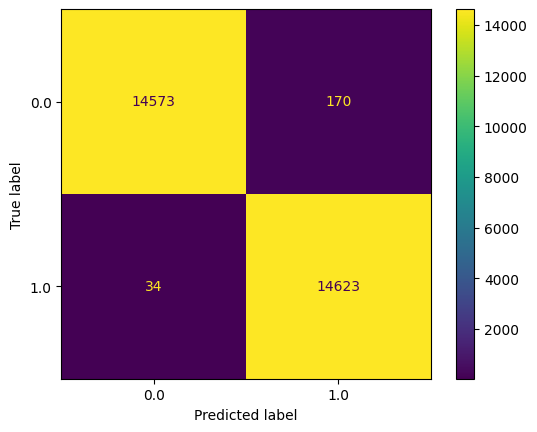

In [36]:

predictions = clf.predict(x_train)
cm = confusion_matrix(y_train, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

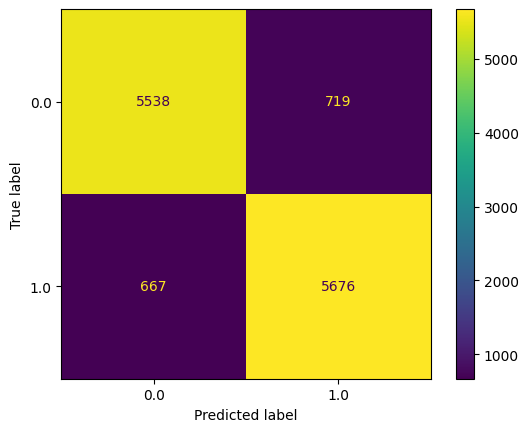

In [37]:
predictions = clf.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

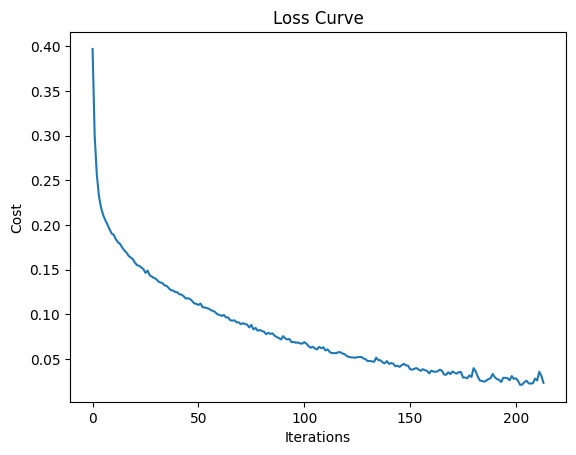

In [38]:
plt.plot(clf.loss_curve_)
plt.title("Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

## Hyper Parameter Tuning of MLP Classifier

In [40]:
mlp = MLPClassifier(max_iter = 200)

parameter_space = {
    'hidden_layer_sizes': [(50), (50, 50), (50, 50, 50), (50, 100, 50), (100, 100, 100), (50, 50 ,50), (50, 50, 50, 50), (100, 100, 100, 100), (100, 100), (100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive']
}

In [41]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs = -1, cv = 3)
clf.fit(x_train, y_train)

/Users/cezaartan/Desktop/University/SIT/CSC3105 - Data Analytics/CSC3105-DA-T2/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/cezaartan/Desktop/University/SIT/CSC3105 - Data Analytics/CSC3105-DA-T2/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/cezaartan/Desktop/University/SIT/CSC3105 - Data Analytics/CSC3105-DA-T2/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/cezaartan/Desktop/University/SIT/CSC3105 - Data Analytics/CSC3105-DA-T2/venv/lib/python3.9

GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [50, (50, 50), (50, 50, 50),
                                                (50, 100, 50), (100, 100, 100),
                                                (50, 50, 50), (50, 50, 50, 50),
                                                (100, 100, 100, 100),
                                                (100, 100), 100],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['adam']})

As a result of the hyper parameter tuning, the best parameters for the MLP Classifier with Dataset 4 are

activation: 'relu', alpha: 0.05, hidden_layer_sizes = 50, learning_rate: constant, solver: adam

Which shows that the Hidden Layer of 1 with 50 Neurons is sufficient

In [42]:
print("Best Parameters Found: \n", clf.best_params_)

Best Parameters Found: 
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': 50, 'learning_rate': 'constant', 'solver': 'adam'}


In [43]:
# Displays the mean, sd and paremeters of the training scores
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.905 (+/-0.004) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 50, 'learning_rate': 'constant', 'solver': 'adam'}
0.903 (+/-0.001) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 50, 'learning_rate': 'adaptive', 'solver': 'adam'}
0.896 (+/-0.004) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.894 (+/-0.003) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.888 (+/-0.005) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.888 (+/-0.003) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.891 (+/-0.002) for {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.886 (+/-0.012) fo

In [44]:
y_test_pred = clf.predict(x_test)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92      6257
         1.0       0.93      0.90      0.91      6343

    accuracy                           0.92     12600
   macro avg       0.92      0.92      0.92     12600
weighted avg       0.92      0.92      0.92     12600



In [45]:
classifier_metrics(list(y_test), y_test_pred, print_results = True)

Accuracy: 0.9153174603174603
Precision: 0.915754357298475
Recall: 0.9154343194269745
F1 Score: 0.9153074477543897
Mean Squared Error (MSE): 0.08468253968253968
Matthews Correlation Coefficient (MCC): 0.8311886151123369
Cohen's Kappa: 0.8306679423060356
Hamming Loss: 0.08468253968253968

Confusion Matrix:
 [[5835  422]
 [ 645 5698]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.93      0.92      6257
         1.0       0.93      0.90      0.91      6343

    accuracy                           0.92     12600
   macro avg       0.92      0.92      0.92     12600
weighted avg       0.92      0.92      0.92     12600





{'accuracy': 0.9153174603174603,
 'precision': 0.915754357298475,
 'recall': 0.9154343194269745,
 'f1': 0.9153074477543897,
 'mcc': 0.8311886151123369,
 'mse': 0.08468253968253968,
 'kappa': 0.8306679423060356,
 'hamming_loss_val': 0.08468253968253968,
 'cm': array([[5835,  422],
        [ 645, 5698]]),
 'class_report': '              precision    recall  f1-score   support\n\n         0.0       0.90      0.93      0.92      6257\n         1.0       0.93      0.90      0.91      6343\n\n    accuracy                           0.92     12600\n   macro avg       0.92      0.92      0.92     12600\nweighted avg       0.92      0.92      0.92     12600\n'}

# Random Forest?

With Original (70,30)

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Define features and target variable
X = combined_df.drop('NLOS', axis=1)
y = combined_df['NLOS']

# Split data into train and test sets (70:30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Export model
save_to_pickle(f'{MODEL_FOLDER}/random_forest.pkl', clf, complete_path=False)

In [7]:
""" Random Forest Model Performance """
y_pred = rf_classifier.predict(X_test)
results = classifier_metrics(list(y_test), y_pred, print_results=True)

Accuracy: 0.8754761904761905
Precision: 0.8789487993318965
Recall: 0.875859527559055
F1 Score: 0.8752629203979323
Mean Squared Error (MSE): 0.12452380952380952
Matthews Correlation Coefficient (MCC): 0.7548020049945755
Cohen's Kappa: 0.7511313983012975
Hamming Loss: 0.12452380952380952

Confusion Matrix:
 [[5776  474]
 [1095 5255]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      6250
         1.0       0.92      0.83      0.87      6350

    accuracy                           0.88     12600
   macro avg       0.88      0.88      0.88     12600
weighted avg       0.88      0.88      0.88     12600





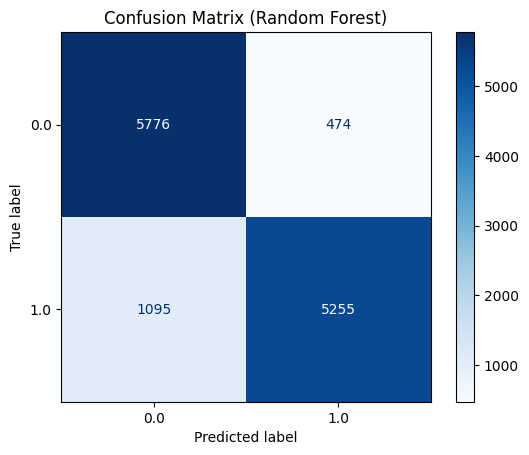

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Random Forest)')
plt.show()

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Define features and target variable
X = dataset_3.drop('NLOS', axis=1)
y = dataset_3['NLOS']

# Split data into train and test sets (70:30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Evaluate performance
y_pred = rf_classifier.predict(X_test)
results = classifier_metrics(list(y_test), y_pred, print_results=True)

Accuracy: 0.921984126984127
Precision: 0.9221871407460105
Recall: 0.922012850473412
F1 Score: 0.9219778516955676
Mean Squared Error (MSE): 0.07801587301587301
Matthews Correlation Coefficient (MCC): 0.8441999732277737
Cohen's Kappa: 0.843976367668862
Hamming Loss: 0.07801587301587301

Confusion Matrix:
 [[5865  419]
 [ 564 5752]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.93      0.92      6284
         1.0       0.93      0.91      0.92      6316

    accuracy                           0.92     12600
   macro avg       0.92      0.92      0.92     12600
weighted avg       0.92      0.92      0.92     12600





In [10]:
from sklearn.ensemble import RandomForestClassifier

# Define features and target variable
X = dataset_4.drop('NLOS', axis=1)
y = dataset_4['NLOS']

# Split data into train and test sets (70:30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Evaluate performance
y_pred = rf_classifier.predict(X_test)
results = classifier_metrics(list(y_test), y_pred, print_results=True)

Accuracy: 0.9043650793650794
Precision: 0.90525186653715
Recall: 0.9044251331023955
F1 Score: 0.9043214701807997
Mean Squared Error (MSE): 0.09563492063492063
Matthews Correlation Coefficient (MCC): 0.8096765775648473
Cohen's Kappa: 0.8087521312744115
Hamming Loss: 0.09563492063492063

Confusion Matrix:
 [[5832  452]
 [ 753 5563]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      6284
         1.0       0.92      0.88      0.90      6316

    accuracy                           0.90     12600
   macro avg       0.91      0.90      0.90     12600
weighted avg       0.91      0.90      0.90     12600





In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Define features and target variable
X = dataset_3.drop('NLOS', axis=1) #features
y = dataset_3['NLOS'] # target

# Split data into train and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train, y_train)

# Predict
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
results = classifier_metrics(list(y_test), y_pred_gb, print_results=True)

Accuracy: 0.9114285714285715
Precision: 0.9118990787748804
Recall: 0.911271363217776
F1 Score: 0.9113731796658626
Mean Squared Error (MSE): 0.08857142857142856
Matthews Correlation Coefficient (MCC): 0.8231702026577279
Cohen's Kappa: 0.8227875337200196
Hamming Loss: 0.08857142857142856

Confusion Matrix:
 [[3933  308]
 [ 436 3723]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.93      0.91      4241
         1.0       0.92      0.90      0.91      4159

    accuracy                           0.91      8400
   macro avg       0.91      0.91      0.91      8400
weighted avg       0.91      0.91      0.91      8400





With DB_SCAN_3 (70,30)

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Define features and target variable
X = dbscan_data_3.drop('NLOS', axis=1)
y = dbscan_data_3['NLOS']

# Split data into train and test sets (70:30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Evaluate performance
y_pred = rf_classifier.predict(X_test)
results = classifier_metrics(list(y_test), y_pred, print_results=True)

Accuracy: 0.9181746031746032
Precision: 0.9185739130224309
Recall: 0.9183061417322835
F1 Score: 0.9181675472131128
Mean Squared Error (MSE): 0.08182539682539683
Matthews Correlation Coefficient (MCC): 0.8368800119161588
Cohen's Kappa: 0.8363836280349184
Hamming Loss: 0.08182539682539683

Confusion Matrix:
 [[5843  407]
 [ 624 5726]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.93      0.92      6250
         1.0       0.93      0.90      0.92      6350

    accuracy                           0.92     12600
   macro avg       0.92      0.92      0.92     12600
weighted avg       0.92      0.92      0.92     12600





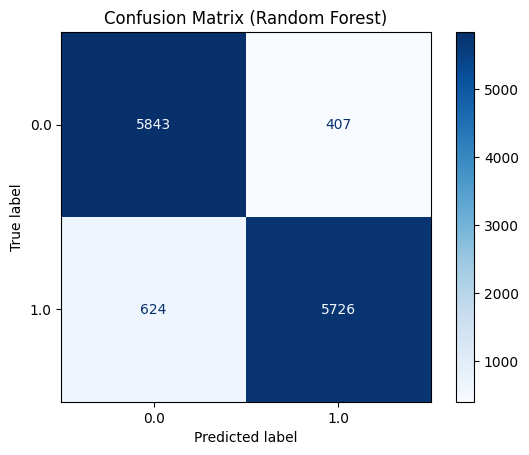

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=rf_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Random Forest)')
plt.show()

Gradient Boost Classification

Classification result with original Datasets combined (80,20)

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Define features and target variable
X = combined_df.drop('NLOS', axis=1) #features
y = combined_df['NLOS'] # target

# Split data into train and test sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train, y_train)

# Predict
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
results = classifier_metrics(list(y_test), y_pred_gb, print_results=True)

Accuracy: 0.9066666666666666
Precision: 0.9074050130377685
Recall: 0.9067335735812888
F1 Score: 0.9066336338156827
Mean Squared Error (MSE): 0.09333333333333334
Matthews Correlation Coefficient (MCC): 0.8141383097429653
Cohen's Kappa: 0.8133568541787506
Hamming Loss: 0.09333333333333334

Confusion Matrix:
 [[3887  300]
 [ 484 3729]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      4187
         1.0       0.93      0.89      0.90      4213

    accuracy                           0.91      8400
   macro avg       0.91      0.91      0.91      8400
weighted avg       0.91      0.91      0.91      8400





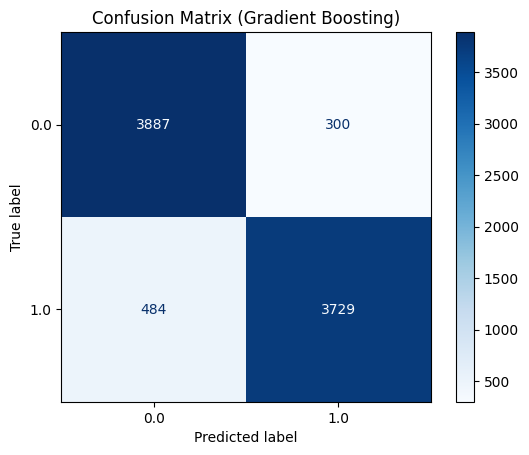

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gb)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=gb_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Gradient Boosting)')
plt.show()

Classification with DBSCAN data 

DB_SCAN_2 (70:30)

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Define features and target variable
X = dbscan_data_2.drop('NLOS', axis=1) #features
y = dbscan_data_2['NLOS'] # target

# Split data into train and test sets (70:30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train, y_train)

# Predict
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
results = classifier_metrics(list(y_test), y_pred_gb, print_results=True)

Accuracy: 0.858015873015873
Precision: 0.8646632324608736
Recall: 0.8585530708661417
F1 Score: 0.8574877905948681
Mean Squared Error (MSE): 0.141984126984127
Matthews Correlation Coefficient (MCC): 0.7231904917262669
Cohen's Kappa: 0.7163237131850941
Hamming Loss: 0.141984126984127

Confusion Matrix:
 [[5789  461]
 [1328 5022]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.93      0.87      6250
         1.0       0.92      0.79      0.85      6350

    accuracy                           0.86     12600
   macro avg       0.86      0.86      0.86     12600
weighted avg       0.87      0.86      0.86     12600





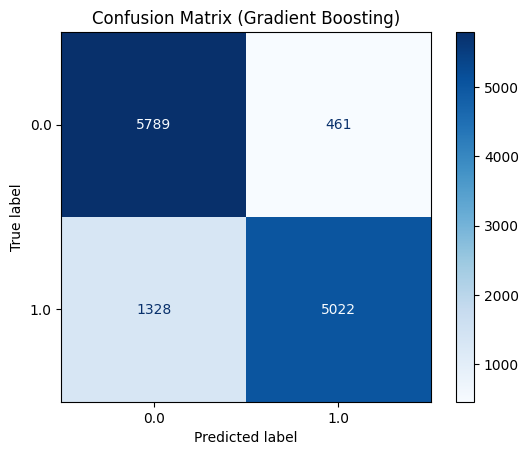

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gb)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=gb_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Gradient Boosting)')
plt.show()

DB_SCAN 3 (70:30)

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Define features and target variable
X = dbscan_data_3.drop('NLOS', axis=1) #features
y = dbscan_data_3['NLOS'] # target

# Split data into train and test sets (70:30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train, y_train)

# Predict
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
results = classifier_metrics(list(y_test), y_pred_gb, print_results=True)

Accuracy: 0.9086507936507936
Precision: 0.9093574857279588
Recall: 0.9088233070866142
F1 Score: 0.9086315202883783
Mean Squared Error (MSE): 0.09134920634920635
Matthews Correlation Coefficient (MCC): 0.8181806184357232
Cohen's Kappa: 0.8173551980837068
Hamming Loss: 0.09134920634920635

Confusion Matrix:
 [[5816  434]
 [ 717 5633]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      6250
         1.0       0.93      0.89      0.91      6350

    accuracy                           0.91     12600
   macro avg       0.91      0.91      0.91     12600
weighted avg       0.91      0.91      0.91     12600





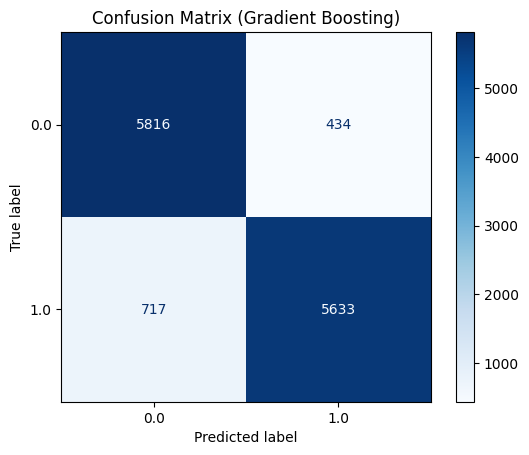

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gb)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=gb_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Gradient Boosting)')
plt.show()

DB_SCAN_1 (70:30)

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Define features and target variable
X = dbscan_data_1.drop('NLOS', axis=1) #features
y = dbscan_data_1['NLOS'] # target

# Split data into train and test sets (70:30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train, y_train)

# Predict
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
results = classifier_metrics(list(y_test), y_pred_gb, print_results=True)

Accuracy: 0.8554761904761905
Precision: 0.8619856529514969
Recall: 0.8560094488188976
F1 Score: 0.8549470698035506
Mean Squared Error (MSE): 0.14452380952380953
Matthews Correlation Coefficient (MCC): 0.717970229988991
Cohen's Kappa: 0.7112473902324534
Hamming Loss: 0.14452380952380953

Confusion Matrix:
 [[5770  480]
 [1341 5009]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.92      0.86      6250
         1.0       0.91      0.79      0.85      6350

    accuracy                           0.86     12600
   macro avg       0.86      0.86      0.85     12600
weighted avg       0.86      0.86      0.85     12600





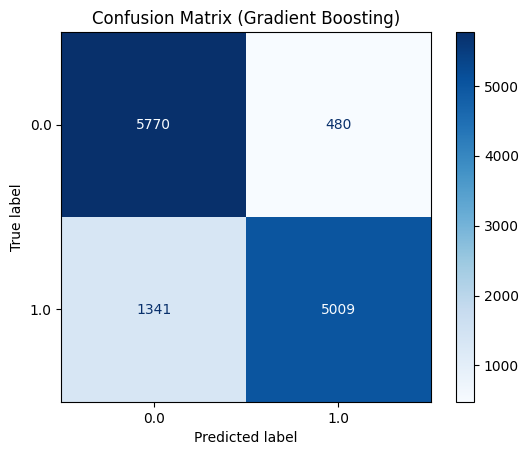

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gb)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=gb_classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Gradient Boosting)')
plt.show()

# MLP Classifier 

In [1]:
# Define features and target variable

X = combined_df.drop('NLOS', axis=1)
y = combined_df['NLOS']

NameError: name 'combined_df' is not defined